In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from PIL import Image
from os import path
import numpy as np

In [2]:
url = "https://www.themoscowtimes.com/"

#News:
response = requests.get(url+"news")
soup = BeautifulSoup(response.text, "html.parser")
titles_container = soup.findAll('h3', {'class': 'article-excerpt-default__headline'})

titles_info = [title.text for title in titles_container]

In [3]:
#News+Opinion:
response = requests.get(url+"opinion")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [4]:
#News+Opinion+Business:
response = requests.get(url+"business")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [5]:
#News+Opinion+Business+ArtAndLife:
response = requests.get(url+"arts-and-life")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [6]:
#News+Opinion+Business+ArtAndLife+Meanwhile:
response = requests.get(url+"meanwhile")
titles_info = str(titles_info) + str([title.text for title in titles_container]) #Final str

pprint(titles_info)

("['Police Catch Drugging, Robbing Spree Suspect in Central Moscow', 'Two "
 "Russian Biathletes Get Four-Year Bans for Doping', 'NATO Calls on Russia to "
 "Destroy New Missile, Warns of Response', 'Russia Sentences Polish National "
 'to 14 Years for Espionage\', "Downed U.S. Drone Was in Iranian Airspace, '
 'Putin\'s Aide Says", \'Russia Plans to Simplify Citizenship for Foreign '
 "Students, Official Says', 'Russia Cleared to Return to Europe’s Top Rights "
 "Body, Ukraine Walks Out', 'Russia Says Military Plane Landed in Venezuela to "
 "Service Equipment', 'Russia’s Middle Class Is Shrinking – Bank Report', "
 "'Russian Air Force Plane Lands in Venezuela – Reports', 'Head of Russia’s "
 "Ingushetia Resigns Following Months of Border Deal Unrest', 'Russian Flight "
 "Ban Could Cost Georgia $300M, Experts Say', 'Nearly Half of Russians Oppose "
 '4-Day Work Week, Poll Says\', "Businessman Yakobashvili Doesn\'t Plan to '
 'Return to Russia After Gallery Searched", \'Putin Extends B

In [7]:
#Clean punctuation:
def replace_punctuation (text, replace):
      return re.sub("[%s]" % re.escape(string.punctuation), replace, text)

titles_info = replace_punctuation(str(titles_info), "")

#Clean other chars:
titles_info = titles_info.replace("’", "").replace("‘", "").replace("'", "").replace("\n","").replace("\t","").replace("\\ ", "").replace("–", "")

#Lower case:
titles_info = titles_info.lower()

titles_info

'police catch drugging robbing spree suspect in central moscow two russian biathletes get fouryear bans for doping nato calls on russia to destroy new missile warns of response russia sentences polish national to 14 years for espionage downed us drone was in iranian airspace putins aide says russia plans to simplify citizenship for foreign students official says russia cleared to return to europes top rights body ukraine walks out russia says military plane landed in venezuela to service equipment russias middle class is shrinking  bank report russian air force plane lands in venezuela  reports head of russias ingushetia resigns following months of border deal unrest russian flight ban could cost georgia 300m experts say nearly half of russians oppose 4day work week poll says businessman yakobashvili doesnt plan to return to russia after gallery searched putin extends ban on eu food imports until end of 2020 is claims gun attack on police near chechen leaders residence  russia warns of

In [8]:
#Token list:
words = nltk.tokenize.word_tokenize(titles_info)

#Stopwords list:
stopwords = nltk.corpus.stopwords.words("english")

#FreqDist:
words_except_stop_dist = nltk.FreqDist(word for word in words if word not in stopwords)

Top 10 frequencies, excluding stopwords:
---------------------------------------------
        Word  Frequency
0     russia         35
1       says         20
2    russian         15
3    missile         10
4      warns         10
5     return         10
6      plane         10
7  venezuela         10
8    russias         10
9    reports         10
---------------------------------------------


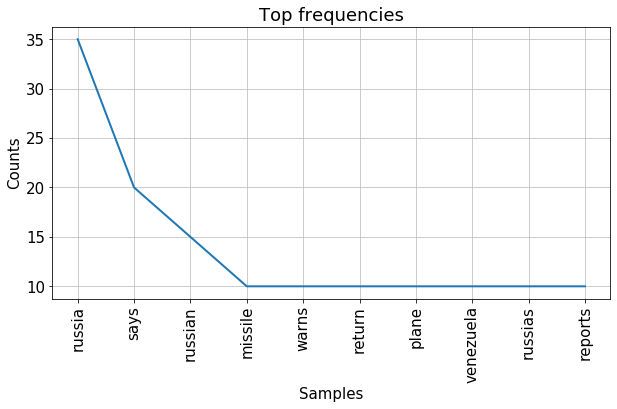

In [9]:
#Results:

top = 10

results = pd.DataFrame(words_except_stop_dist.most_common(top), columns = ["Word", "Frequency"])

print("Top", top, "frequencies, excluding stopwords:")
print("-" * 45)
print(results)
print("-" * 45)

#Graph:
plt.figure(figsize=(10,5)) #Change graph size

plt.rcParams.update({'font.size': 15}) #Change text size

words_except_stop_dist.plot(top, title = "Top frequencies")

In [30]:
#Word tags: https://www.sketchengine.eu/penn-treebank-tagset/
word_tags = nltk.pos_tag(words_except_stop_dist) #Return list
word_tags = pd.DataFrame(word_tags, columns = ["Word", "Tag"])

word_tags.head(20)

,Word,Tag
0,police,NNS
1,catch,VBP
2,drugging,VBG
3,robbing,VBG
4,spree,JJ
5,suspect,JJ
6,central,JJ
7,moscow,NN
8,two,CD
9,russian,JJ


In [33]:
#Delete verbs:
def delete_tag_in_df(df, column, tag):
    df.drop(df[df[column].str.startswith(tag)].index.tolist(), inplace = True)
    
#Delete "russia", "russian"...:
def delete_family_in_df(df, column, family):
    df.drop(df[df[column].str.startswith(family)].index.tolist(), inplace = True)
    
delete_tag_in_df(word_tags, "Tag" , "VB")
delete_tag_in_df(word_tags, "Word" , "russia")

word_tags.head(20)

,Word,Tag
0,police,NNS
4,spree,JJ
5,suspect,JJ
6,central,JJ
7,moscow,NN
8,two,CD
10,biathletes,NNS
12,fouryear,JJ
13,bans,NNS
15,nato,JJ


In [ ]:
#Result values to STR:
results_STR = [word for word in words if word not in stopwords]
results_STR = ", ".join(results_STR)

results_STR

In [ ]:
mask = np.array(Image.open(requests.get("https://banner2.kisspng.com/20180703/vlx/kisspng-russian-revolution-blank-map-clip-art-map-russia-5b3c150076f918.4360855015306641924873.jpg", stream = True).raw))

def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 1000, height = 1000, background_color = "white", mask = mask).generate(words)
    plt.figure(figsize = (12, 12),facecolor = None)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    
generate_wordcloud(results_STR, mask)